In [1]:
import pandas as pd
import random
import os
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import sklearn

from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, merge, Input, BatchNormalization, Lambda, Cropping2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils.data_utils import get_file

%matplotlib inline

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

In [3]:
#df = pd.read_csv('./data/driving_log2.csv', skipinitialspace=True)
df = pd.read_csv('./data/driving_log5.csv', skipinitialspace=True)
df.columns = ['center', 'left', 'right', 'dir', 'acc', 'nacc', 'speed']
df = df.reset_index(drop=True)
df

,center,left,right,dir,acc,nacc,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [4]:
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1:
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples.iloc[offset:offset+batch_size]

            images = []
            angles = []
            for idx in range(batch_samples.shape[0]):
                name = './data/'+batch_samples.iloc[idx]['center']
                center_image = cv2.cvtColor( cv2.imread(name), cv2.COLOR_BGR2RGB )
                center_angle = float(batch_samples.iloc[idx]['dir'])
                center_image_flipped = np.fliplr(center_image)
                center_angle_flipped = -center_angle
                images.append(center_image)
                angles.append(center_angle)
                images.append(center_image_flipped)
                angles.append(center_angle_flipped)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)


train_samples, validation_samples = train_test_split(df, test_size=0.05)
sklearn.utils.shuffle(train_samples)
train_generator = generator(train_samples)
validation_generator = generator(validation_samples)

In [5]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))

#model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70, 25), (0,0))) )
model.add(Convolution2D(24,5,5,subsample=(2,2), activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2), activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2), activation="relu"))
model.add(Convolution2D(64,3,3, activation="relu"))
model.add(Convolution2D(64,3,3, activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer="adam")


In [6]:
from keras.callbacks import ModelCheckpoint, TensorBoard

best_model = ModelCheckpoint("NvidiaModel.track2.h5", monitor='val_loss', verbose=0, save_best_only=True)
!rm -rf ./logs
model.fit_generator(
        train_generator,
        samples_per_epoch=2048,
        nb_epoch=40,
        validation_data=validation_generator,
        nb_val_samples=validation_samples.shape[0],
        callbacks=[best_model])

Epoch 1/40
2048/2048 [==============================] - 25s - loss: 0.0992 - val_loss: 0.1042

/home/huboqiang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


2094/2048 [==============================] - 17s - loss: 0.0621 - val_loss: 0.0713
Epoch 32/40
2048/2048 [==============================] - 14s - loss: 0.0572 - val_loss: 0.0700

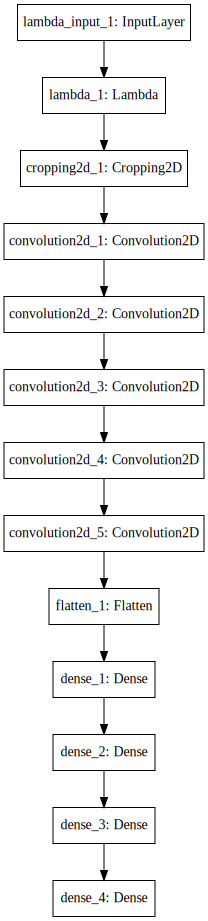

In [9]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))